# Import & Data preprocessing

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping

In [3]:
# 데이터 불러오기
data = pd.read_csv("./data/tr_eod_data_rounded.csv", index_col=0, parse_dates=True)
aapl_data = data[['AAPL.O']].dropna()

# 데이터 전처리 (표준화)
scaler = StandardScaler()
aapl_data_scaled = scaler.fit_transform(aapl_data)
aapl_data_scaled = pd.DataFrame(aapl_data_scaled, index=aapl_data.index, columns=['AAPL.O'])

# 시퀀스 생성 & 교차 검증 설정

In [6]:
# 시계열 데이터 생성 함수
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:(i + window_size), 0])
        y.append(data[i + window_size, 0])
    return np.array(X), np.array(y)

# 하이퍼파라미터 설정
window_size = 30  # 30일의 데이터를 사용하여 다음 값을 예측
epochs = 100  # 성능 향상을 위해 에포크 수를 늘림
batch_size = 32  # 기본 배치 사이즈

# TimeSeriesSplit 사용
tscv = TimeSeriesSplit(n_splits=5)
fold = 1  # 교차 검증 fold를 추적하기 위한 변수

/root/miniconda3/envs/my_env/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 1.4693 - val_loss: 0.1421
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.3446 - val_loss: 0.0245
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0634 - val_loss: 0.0274
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0395 - val_loss: 0.0256
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0427 - val_loss: 0.0317
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0341 - val_loss: 0.0332
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0324 - val_loss: 0.0311
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0311 - val_loss: 0.0329
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0307 - val_loss: 0.0378
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0286 - val_loss: 0.0383
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0286 - val_loss: 0.0385
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step

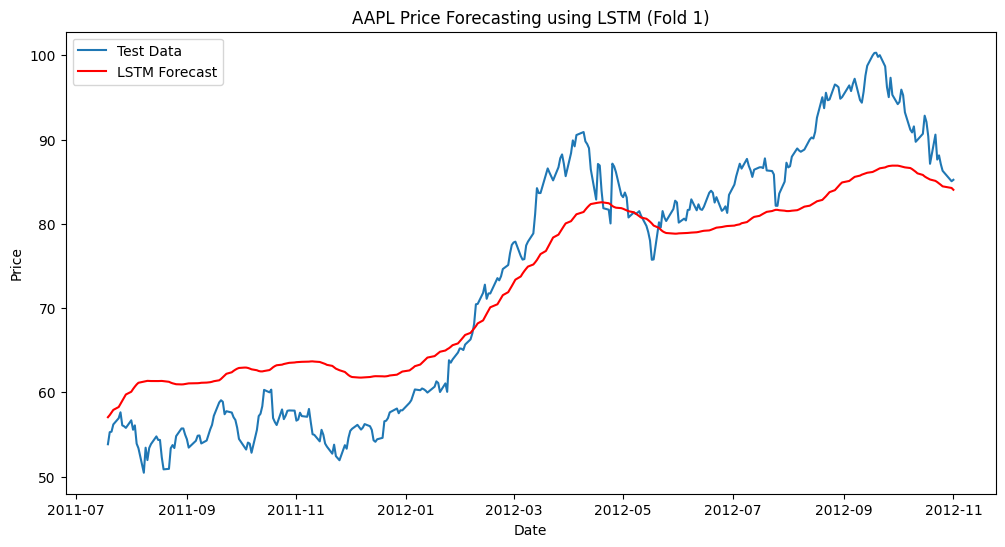

Epoch 1/100


/root/miniconda3/envs/my_env/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.7248 - val_loss: 0.0069
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0509 - val_loss: 0.0068
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0249 - val_loss: 0.0071
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0214 - val_loss: 0.0068
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0187 - val_loss: 0.0058
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0167 - val_loss: 0.0074
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0159 - val_loss: 0.0052
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0187 - val_loss: 0.0100
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0141 - val_loss: 0.0133
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0166 - val_loss: 0.0073
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0191 - val_loss: 0.0056
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0

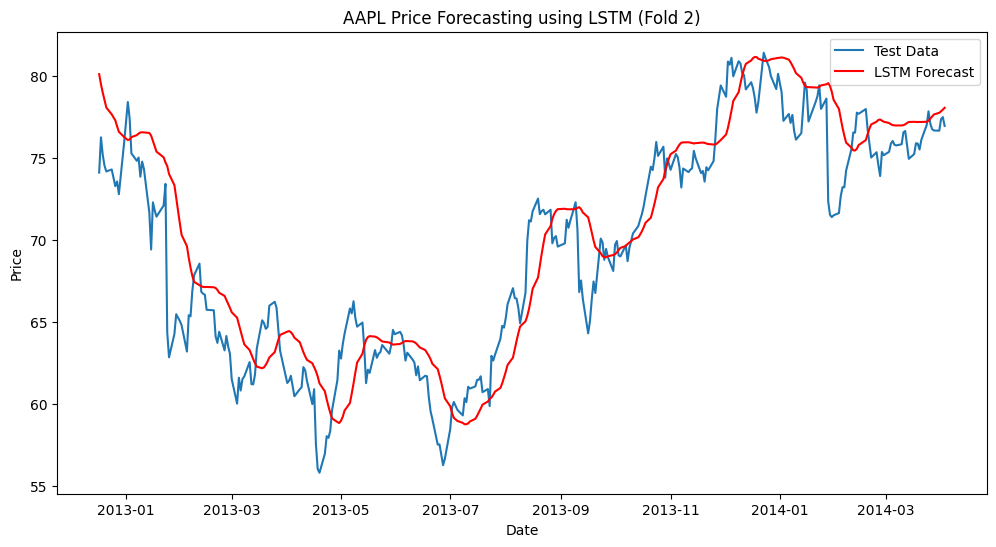

Epoch 1/100


/root/miniconda3/envs/my_env/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.5701 - val_loss: 0.3750
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0278 - val_loss: 0.2677
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0200 - val_loss: 0.1611
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0174 - val_loss: 0.0974
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0153 - val_loss: 0.0782
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0144 - val_loss: 0.0396
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0150 - val_loss: 0.0543
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0136 - val_loss: 0.0542
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0148 - val_loss: 0.0276
Epoch 10/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0144 - val_loss: 0.0444
Epoch 11/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0121 - val_loss: 0.0070
Epoch 12/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0

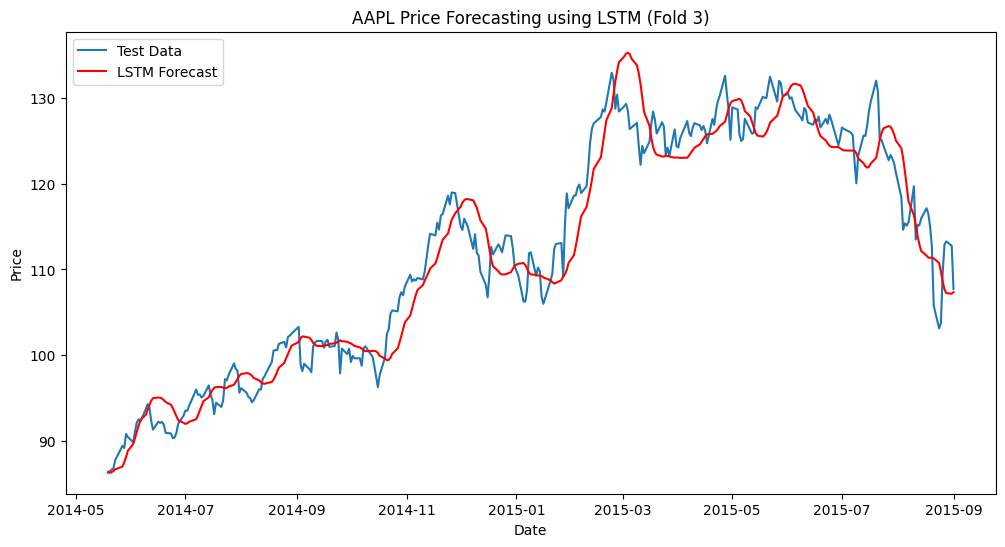

Epoch 1/100


/root/miniconda3/envs/my_env/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3742 - val_loss: 0.0196
Epoch 2/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0205 - val_loss: 0.0128
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0182 - val_loss: 0.0107
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0176 - val_loss: 0.0089
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0142 - val_loss: 0.0083
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0147 - val_loss: 0.0073
Epoch 7/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0130 - val_loss: 0.0074
Epoch 8/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0133 - val_loss: 0.0071
Epoch 9/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0134 - val_loss: 0.0076
Epoch 10/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0127 - val_loss: 0.0062
Epoch 11/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0121 - val_loss: 0.0060
Epoch 12/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0

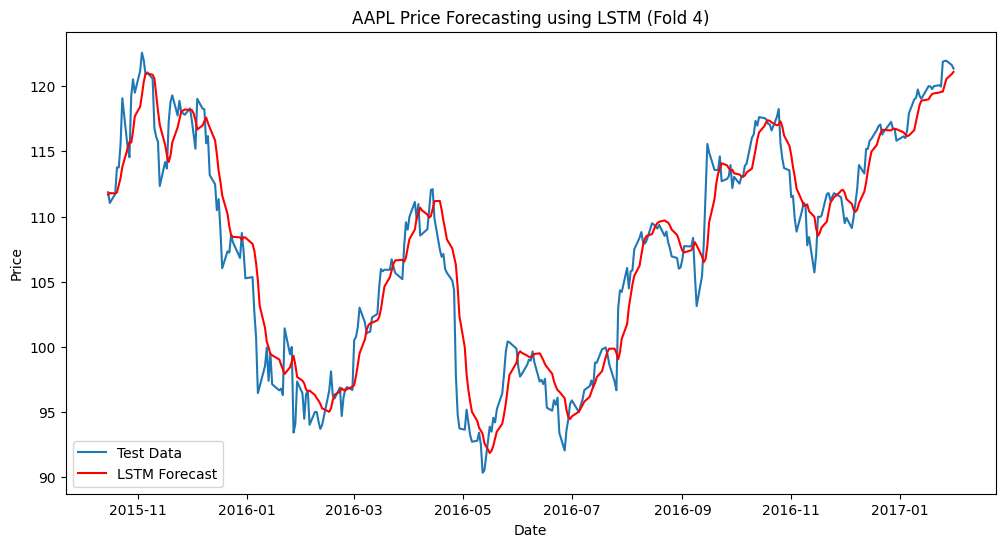

Epoch 1/100


/root/miniconda3/envs/my_env/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2194 - val_loss: 6.7367
Epoch 2/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0207 - val_loss: 0.8619
Epoch 3/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0166 - val_loss: 0.9170
Epoch 4/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0160 - val_loss: 0.0875
Epoch 5/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0156 - val_loss: 0.0289
Epoch 6/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0125 - val_loss: 0.0148
Epoch 7/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0136 - val_loss: 0.0283
Epoch 8/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0124 - val_loss: 0.0801
Epoch 9/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0126 - val_loss: 0.0264
Epoch 10/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0121 - val_loss: 0.0283
Epoch 11/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0113 - val_loss: 0.0509
Epoch 12/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0

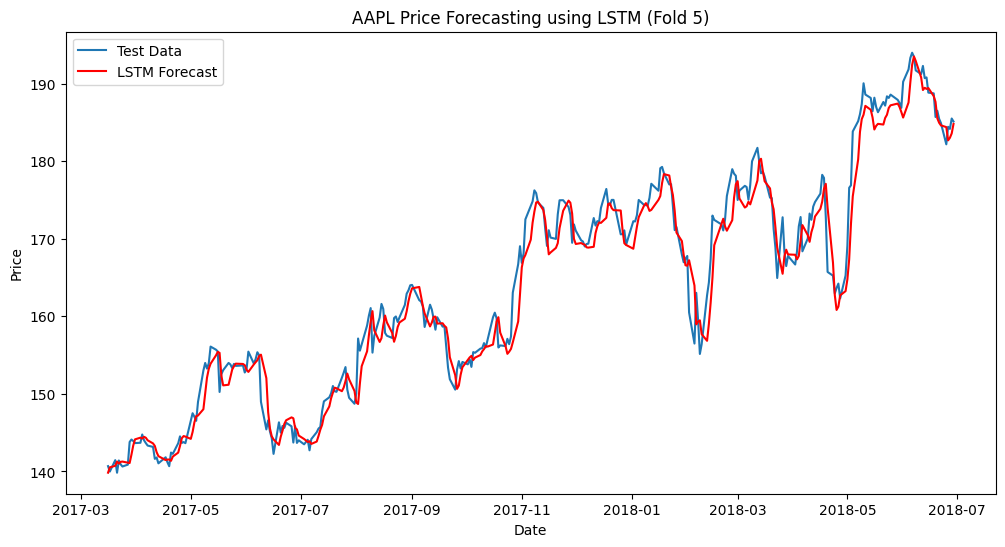

Cross Validation Results:
Average MSE: 14.45357086760112
Average MAE: 2.839001747271766
Average R^2: 0.8947155661573964


In [7]:
# 교차 검증을 통한 모델 학습 및 평가
mse_list, mae_list, r2_list = [], [], []

for train_index, test_index in tscv.split(aapl_data_scaled):
    train, test = aapl_data_scaled.iloc[train_index], aapl_data_scaled.iloc[test_index]

    # 시계열 데이터 생성
    X_train, y_train = create_sequences(train.values, window_size)
    X_test, y_test = create_sequences(test.values, window_size)

    # LSTM 입력 형태에 맞게 데이터 차원 변경
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    # LSTM 모델 구축 (성능 개선)
    lstm_model = Sequential()
    lstm_model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(window_size, 1)))
    lstm_model.add(Dropout(0.2))  # 과적합 방지를 위한 드롭아웃
    lstm_model.add(LSTM(50, activation='relu'))  # 두 번째 LSTM 레이어 추가
    lstm_model.add(Dropout(0.2))
    lstm_model.add(Dense(1))
    lstm_model.compile(optimizer='adam', loss='mse')

    # Early Stopping (조기 종료) 추가
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # 모델 학습
    lstm_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test),
                   callbacks=[early_stopping], verbose=1)

    # 테스트 데이터 예측
    lstm_forecast = lstm_model.predict(X_test)

    # 예측 결과를 원래 스케일로 복원
    lstm_forecast_unscaled = scaler.inverse_transform(lstm_forecast)
    y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1))

    # 성능 평가
    mse = mean_squared_error(y_test_unscaled, lstm_forecast_unscaled)
    mae = mean_absolute_error(y_test_unscaled, lstm_forecast_unscaled)
    r2 = r2_score(y_test_unscaled, lstm_forecast_unscaled)
    
    mse_list.append(mse)
    mae_list.append(mae)
    r2_list.append(r2)

    print(f"Fold {fold}:")
    print(f"LSTM Mean Squared Error: {mse}")
    print(f"LSTM Mean Absolute Error: {mae}")
    print(f"LSTM R^2 Score: {r2}")
    
    # 예측 결과 시각화 (LSTM)
    plt.figure(figsize=(12, 6))
    plt.plot(test.index[window_size:], y_test_unscaled, label='Test Data')
    plt.plot(test.index[window_size:], lstm_forecast_unscaled, label='LSTM Forecast', color='red')
    plt.legend()
    plt.title(f'AAPL Price Forecasting using LSTM (Fold {fold})')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()

    fold += 1

# 교차 검증 결과 출력
print("Cross Validation Results:")
print(f"Average MSE: {np.mean(mse_list)}")
print(f"Average MAE: {np.mean(mae_list)}")
print(f"Average R^2: {np.mean(r2_list)}")

In [9]:
print(f"Average MSE: {mse_list}")
print(f"Average MAE: {mae_list}")
print(f"Average R^2: {r2_list}")

Average MSE: [40.33818995841652, 8.468935641935413, 11.445052436815935, 5.473095923406486, 6.542580377431252]
Average MAE: [5.521307300029357, 2.283848712663709, 2.7705035400390625, 1.7511316386029765, 1.8682175450237255]
Average R^2: [0.8325543959887588, 0.8112608919575538, 0.9366279885687299, 0.9252356136316122, 0.9678989406403277]


In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [7]:
# 데이터 불러오기
data = pd.read_csv("./data/tr_eod_data_rounded.csv", index_col=0, parse_dates=True)
aapl_data = data[['AAPL.O']].dropna()

# 데이터 전처리 (표준화)
scaler = StandardScaler()
aapl_data_scaled = scaler.fit_transform(aapl_data)
aapl_data_scaled = pd.DataFrame(aapl_data_scaled, index=aapl_data.index, columns=['AAPL.O'])

# 데이터 분할 (80% 학습, 20% 테스트)
train_size = int(len(aapl_data_scaled) * 0.8)
train = aapl_data_scaled.iloc[:train_size]
test = aapl_data_scaled.iloc[train_size:]

In [8]:
# 시계열 데이터 생성 함수
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:(i + window_size), 0])
        y.append(data[i + window_size, 0])
    return np.array(X), np.array(y)

# 하이퍼파라미터 설정
window_size = 30  # 30일의 데이터를 사용하여 다음 값을 예측

# 시계열 데이터 생성
X_train, y_train = create_sequences(train.values, window_size)
X_test, y_test = create_sequences(test.values, window_size)

In [9]:
# PyTorch Dataset 생성
class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Transformer 모델 정의
class TransformerModel(nn.Module):
    def __init__(self, input_dim, embed_dim, num_heads, hidden_dim, num_layers, output_dim, dropout=0.1):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_dim, embed_dim)
        encoder_layer = nn.TransformerEncoderLayer(d_model=embed_dim, nhead=num_heads, dim_feedforward=hidden_dim, dropout=dropout)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.fc = nn.Linear(embed_dim, output_dim)

    def forward(self, src):
        src = self.embedding(src)
        src = self.transformer_encoder(src)
        output = self.fc(src[:, -1, :])  # 마지막 시점의 값만 출력
        return output

In [10]:
# 모델 하이퍼파라미터 설정
input_dim = 1
embed_dim = 64
num_heads = 4
hidden_dim = 128
num_layers = 3
output_dim = 1
dropout = 0.1

# 모델 초기화
model = TransformerModel(input_dim, embed_dim, num_heads, hidden_dim, num_layers, output_dim, dropout)

# 손실 함수 및 최적화 기법 설정
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# 모델 학습
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        output = model(X_batch)
        loss = criterion(output, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * X_batch.size(0)
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x30 and 1x64)

In [ ]:
# 테스트 데이터 예측
model.eval()
predictions = []
with torch.no_grad():
    for X_batch, _ in test_loader:
        X_batch = X_batch.to(device)
        output = model(X_batch)
        predictions.append(output.cpu().numpy())

predictions = np.concatenate(predictions)

In [ ]:
# 데이터 분할 (랜덤 포레스트 용)
X_rf = np.array([i for i in range(len(train))]).reshape(-1, 1)  # 인덱스를 특징으로 사용
y_rf = train.values.flatten()

# Time Series Split for Validation
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X_rf):
    X_rf_train, X_rf_val = X_rf[train_index], X_rf[test_index]
    y_rf_train, y_rf_val = y_rf[train_index], y_rf[test_index]

In [ ]:
# 랜덤 포레스트 모델 학습
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_rf_train, y_rf_train)

# 예측
X_rf_test_full = np.array([i for i in range(len(train), len(train) + len(test))]).reshape(-1, 1)
rf_forecast = rf_model.predict(X_rf_test_full)
rf_forecast_unscaled = scaler.inverse_transform(rf_forecast.reshape(-1, 1)).flatten()

In [ ]:
# 예측 결과 시각화 (Random Forest)
plt.figure(figsize=(12, 6))
plt.plot(train.index, train_unscaled, label='Train Data')
plt.plot(test.index, test.values.flatten(), label='Test Data')
plt.plot(test.index, rf_forecast_unscaled, label='Random Forest Forecast', color='green')
plt.legend()
plt.title('AAPL Price Forecasting using Random Forest')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# 성능 평가 (Random Forest)
rf_mse = mean_squared_error(test.values.flatten(), rf_forecast_unscaled)
rf_mae = mean_absolute_error(test.values.flatten(), rf_forecast_unscaled)
rf_r2 = r2_score(test.values.flatten(), rf_forecast_unscaled)
print(f"Random Forest Mean Squared Error: {rf_mse}")
print(f"Random Forest Mean Absolute Error: {rf_mae}")
print(f"Random Forest R^2 Score: {rf_r2}")

In [ ]:
# ARIMA 모델 학습 (최적의 파라미터 탐색)
arima_model = pm.auto_arima(train, 
                            seasonal=False,  # 계절성 고려하지 않음
                            stepwise=True,  # 단계별로 파라미터 탐색
                            trace=True,  # 모델 학습 과정 출력
                            error_action='ignore',  # 에러 발생 시 무시하고 진행
                            suppress_warnings=True,  # 경고 숨기기
                            max_p=10, max_q=10, max_d=5,  # 최대 차수 설정
                            information_criterion='aic',  # AIC 기준으로 최적화
                            n_jobs=-1)  # 병렬처리 사용

# 최적 모델로 학습 데이터 전체로 다시 학습
arima_model.fit(train)

# 테스트 데이터 예측
arima_forecast = arima_model.predict(n_periods=len(test))
arima_forecast_unscaled = scaler.inverse_transform(np.array(arima_forecast).reshape(-1, 1)).flatten()

In [ ]:
# 예측 결과 시각화 (ARIMA)
plt.figure(figsize=(12, 6))
plt.plot(train.index, train_unscaled, label='Train Data')
plt.plot(test.index, test.values.flatten(), label='Test Data')
plt.plot(test.index, arima_forecast_unscaled, label='ARIMA Forecast', color='blue')
plt.legend()
plt.title('AAPL Price Forecasting using ARIMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# 성능 평가 (ARIMA)
arima_mse = mean_squared_error(test.values.flatten(), arima_forecast_unscaled)
arima_mae = mean_absolute_error(test.values.flatten(), arima_forecast_unscaled)
arima_r2 = r2_score(test.values.flatten(), arima_forecast_unscaled)
print(f"ARIMA Mean Squared Error: {arima_mse}")
print(f"ARIMA Mean Absolute Error: {arima_mae}")
print(f"ARIMA R^2 Score: {arima_r2}")